# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **Data Loading**

In [ ]:

# Gantilah ID file dengan ID dari Google Drive URL
file_id = '19IfOP0QmCHccMu8A6B2fCUpFqZwCxuzO'

# Buat URL unduhan langsung
download_url = f'https://drive.google.com/uc?id={file_id}'

# Baca file CSV dari URL
data = pd.read_csv(download_url)

# Backup data
# data_backup = data.copy()

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
# data.head(40)

# print("\nInformasi dataset:")
# data.info()

# Cek missing values
# print("\nMissing values per fitur:")
# print(data.isnull().sum())

# Menghapus fitur yang tidak diperlukan
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Memilih fitur numerik
num_features = data.select_dtypes(include=[np.number])
# Distribusi fitur kategorikal
cat_features = data.select_dtypes(include=[object])

**Boxplot**

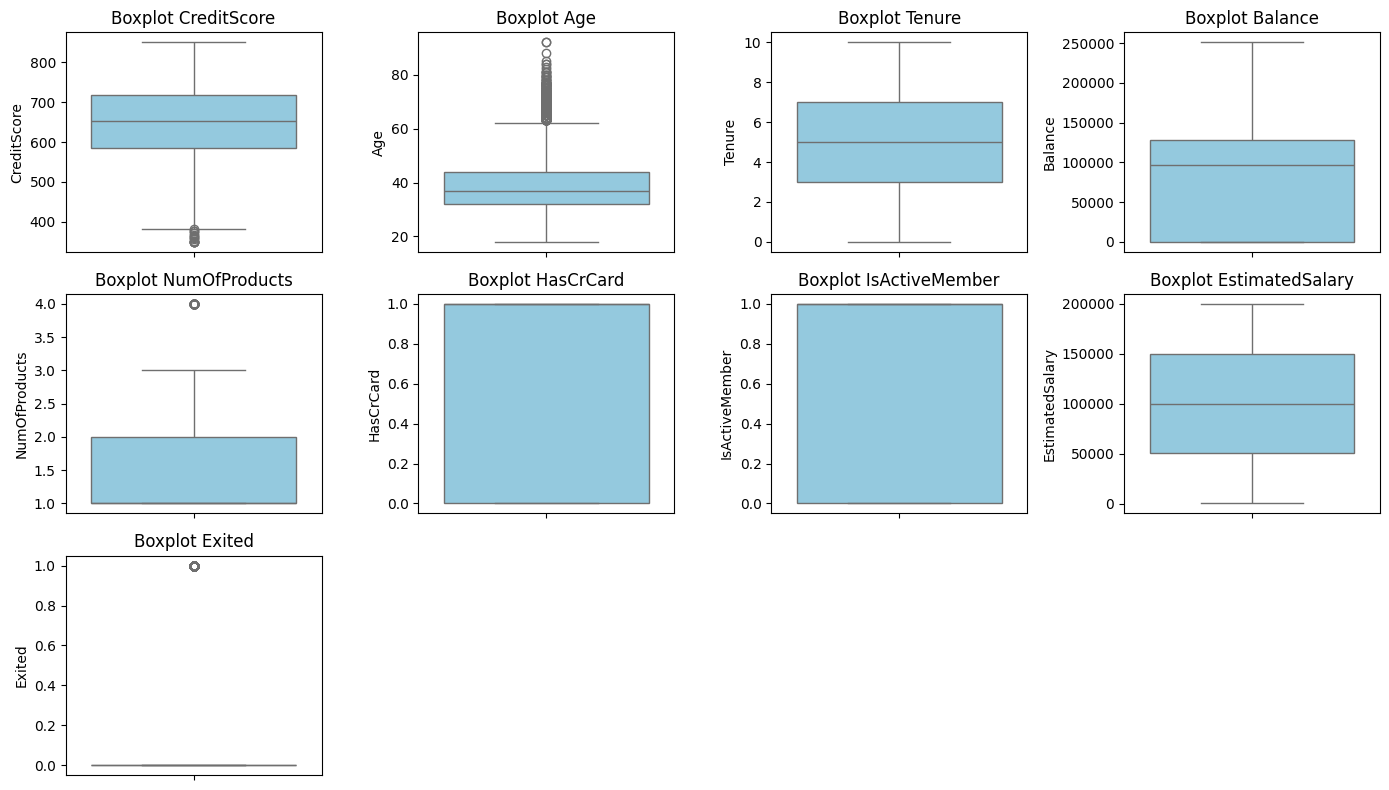

,Kolom,Q1,Q3,IQR,Batas Bawah,Batas Atas,Jumlah Outliers
0,CreditScore,584.00,718.0000,134.0000,383.00000,919.00000,15
1,Age,32.00,44.0000,12.0000,14.00000,62.00000,359
2,Tenure,3.00,7.0000,4.0000,-3.00000,13.00000,0
3,Balance,0.00,127644.2400,127644.2400,-191466.36000,319110.60000,0
4,NumOfProducts,1.00,2.0000,1.0000,-0.50000,3.50000,60
5,HasCrCard,0.00,1.0000,1.0000,-1.50000,2.50000,0
6,IsActiveMember,0.00,1.0000,1.0000,-1.50000,2.50000,0
7,EstimatedSalary,51002.11,149388.2475,98386.1375,-96577.09625,296967.45375,0
8,Exited,0.00,0.0000,0.0000,0.00000,0.00000,2037


In [ ]:
# Membuat boxplot untuk setiap fitur numerik
plt.figure(figsize=(14, 8))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[column], color='skyblue')
    plt.title(f'Boxplot {column}')
plt.tight_layout()
plt.show()

# Inisialisasi list untuk menyimpan hasil
outliers_info = []

# Loop melalui setiap kolom numerik
for column in num_features.columns:
    # Hitung Q1, Q3, dan IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan batas atas untuk outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    num_outliers = len(outliers)

    # Simpan hasil ke dalam list
    outliers_info.append({
        'Kolom': column,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Batas Bawah': lower_bound,
        'Batas Atas': upper_bound,
        'Jumlah Outliers': num_outliers
    })

# Buat DataFrame dari list hasil
outliers_table = pd.DataFrame(outliers_info)

# Tampilkan tabel
display(outliers_table)

**Histogram Numerik**

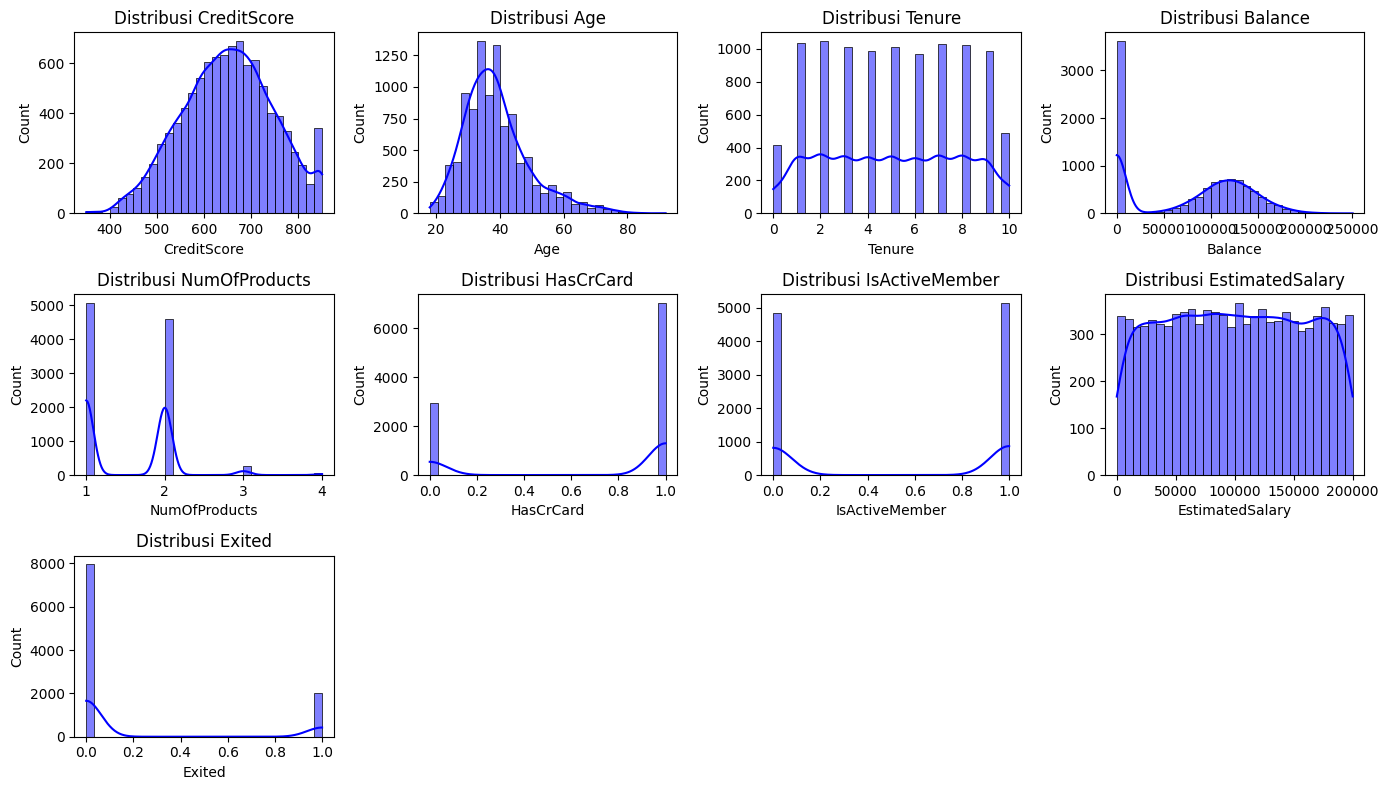

In [ ]:
# Membuat histogram untuk setiap fitur numerik
plt.figure(figsize=(14, 8))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

**Histogram Kategori**

<ipython-input-12-f4c16b7ce0ae>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette='viridis')
<ipython-input-12-f4c16b7ce0ae>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette='viridis')


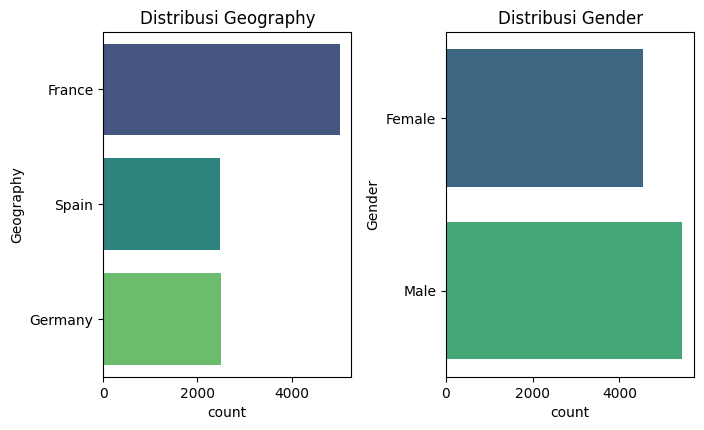

In [ ]:
# Membuat histogram untuk setiap fitur kategori
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=data[column], palette='viridis')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

**Heatmap**

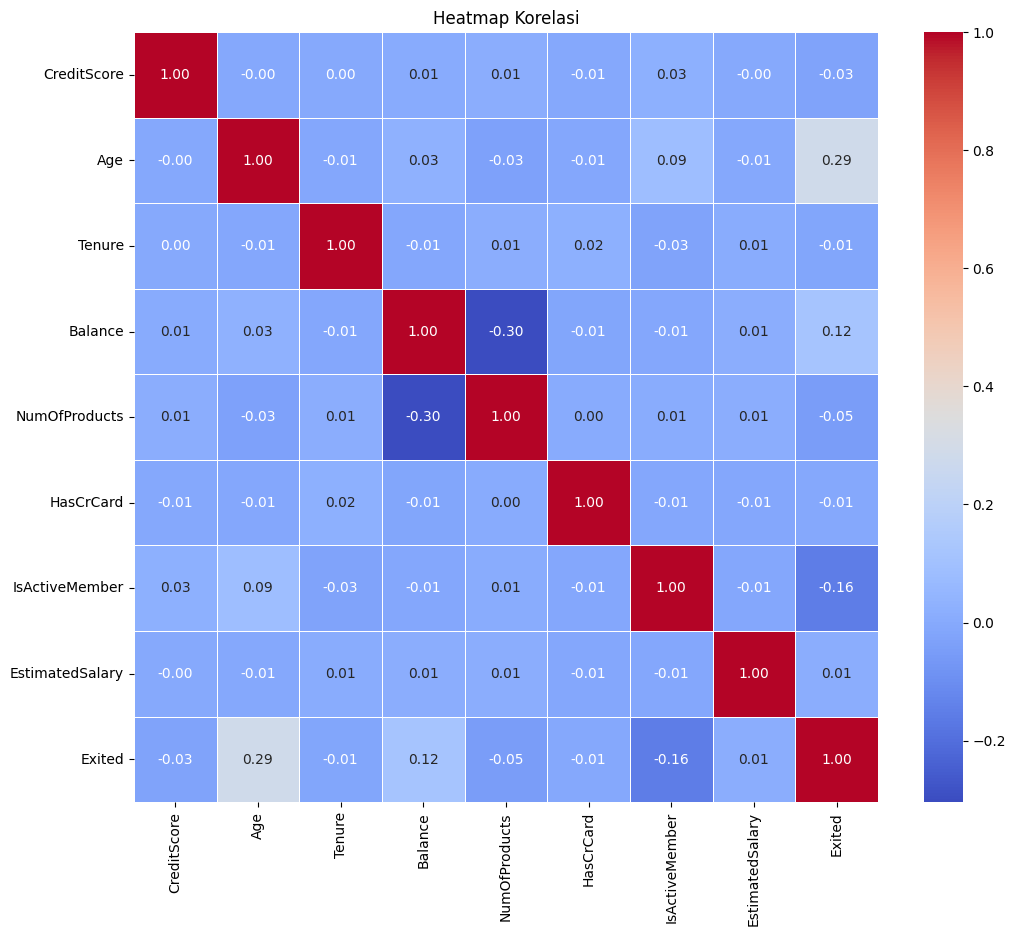

In [ ]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

**Pairplot**

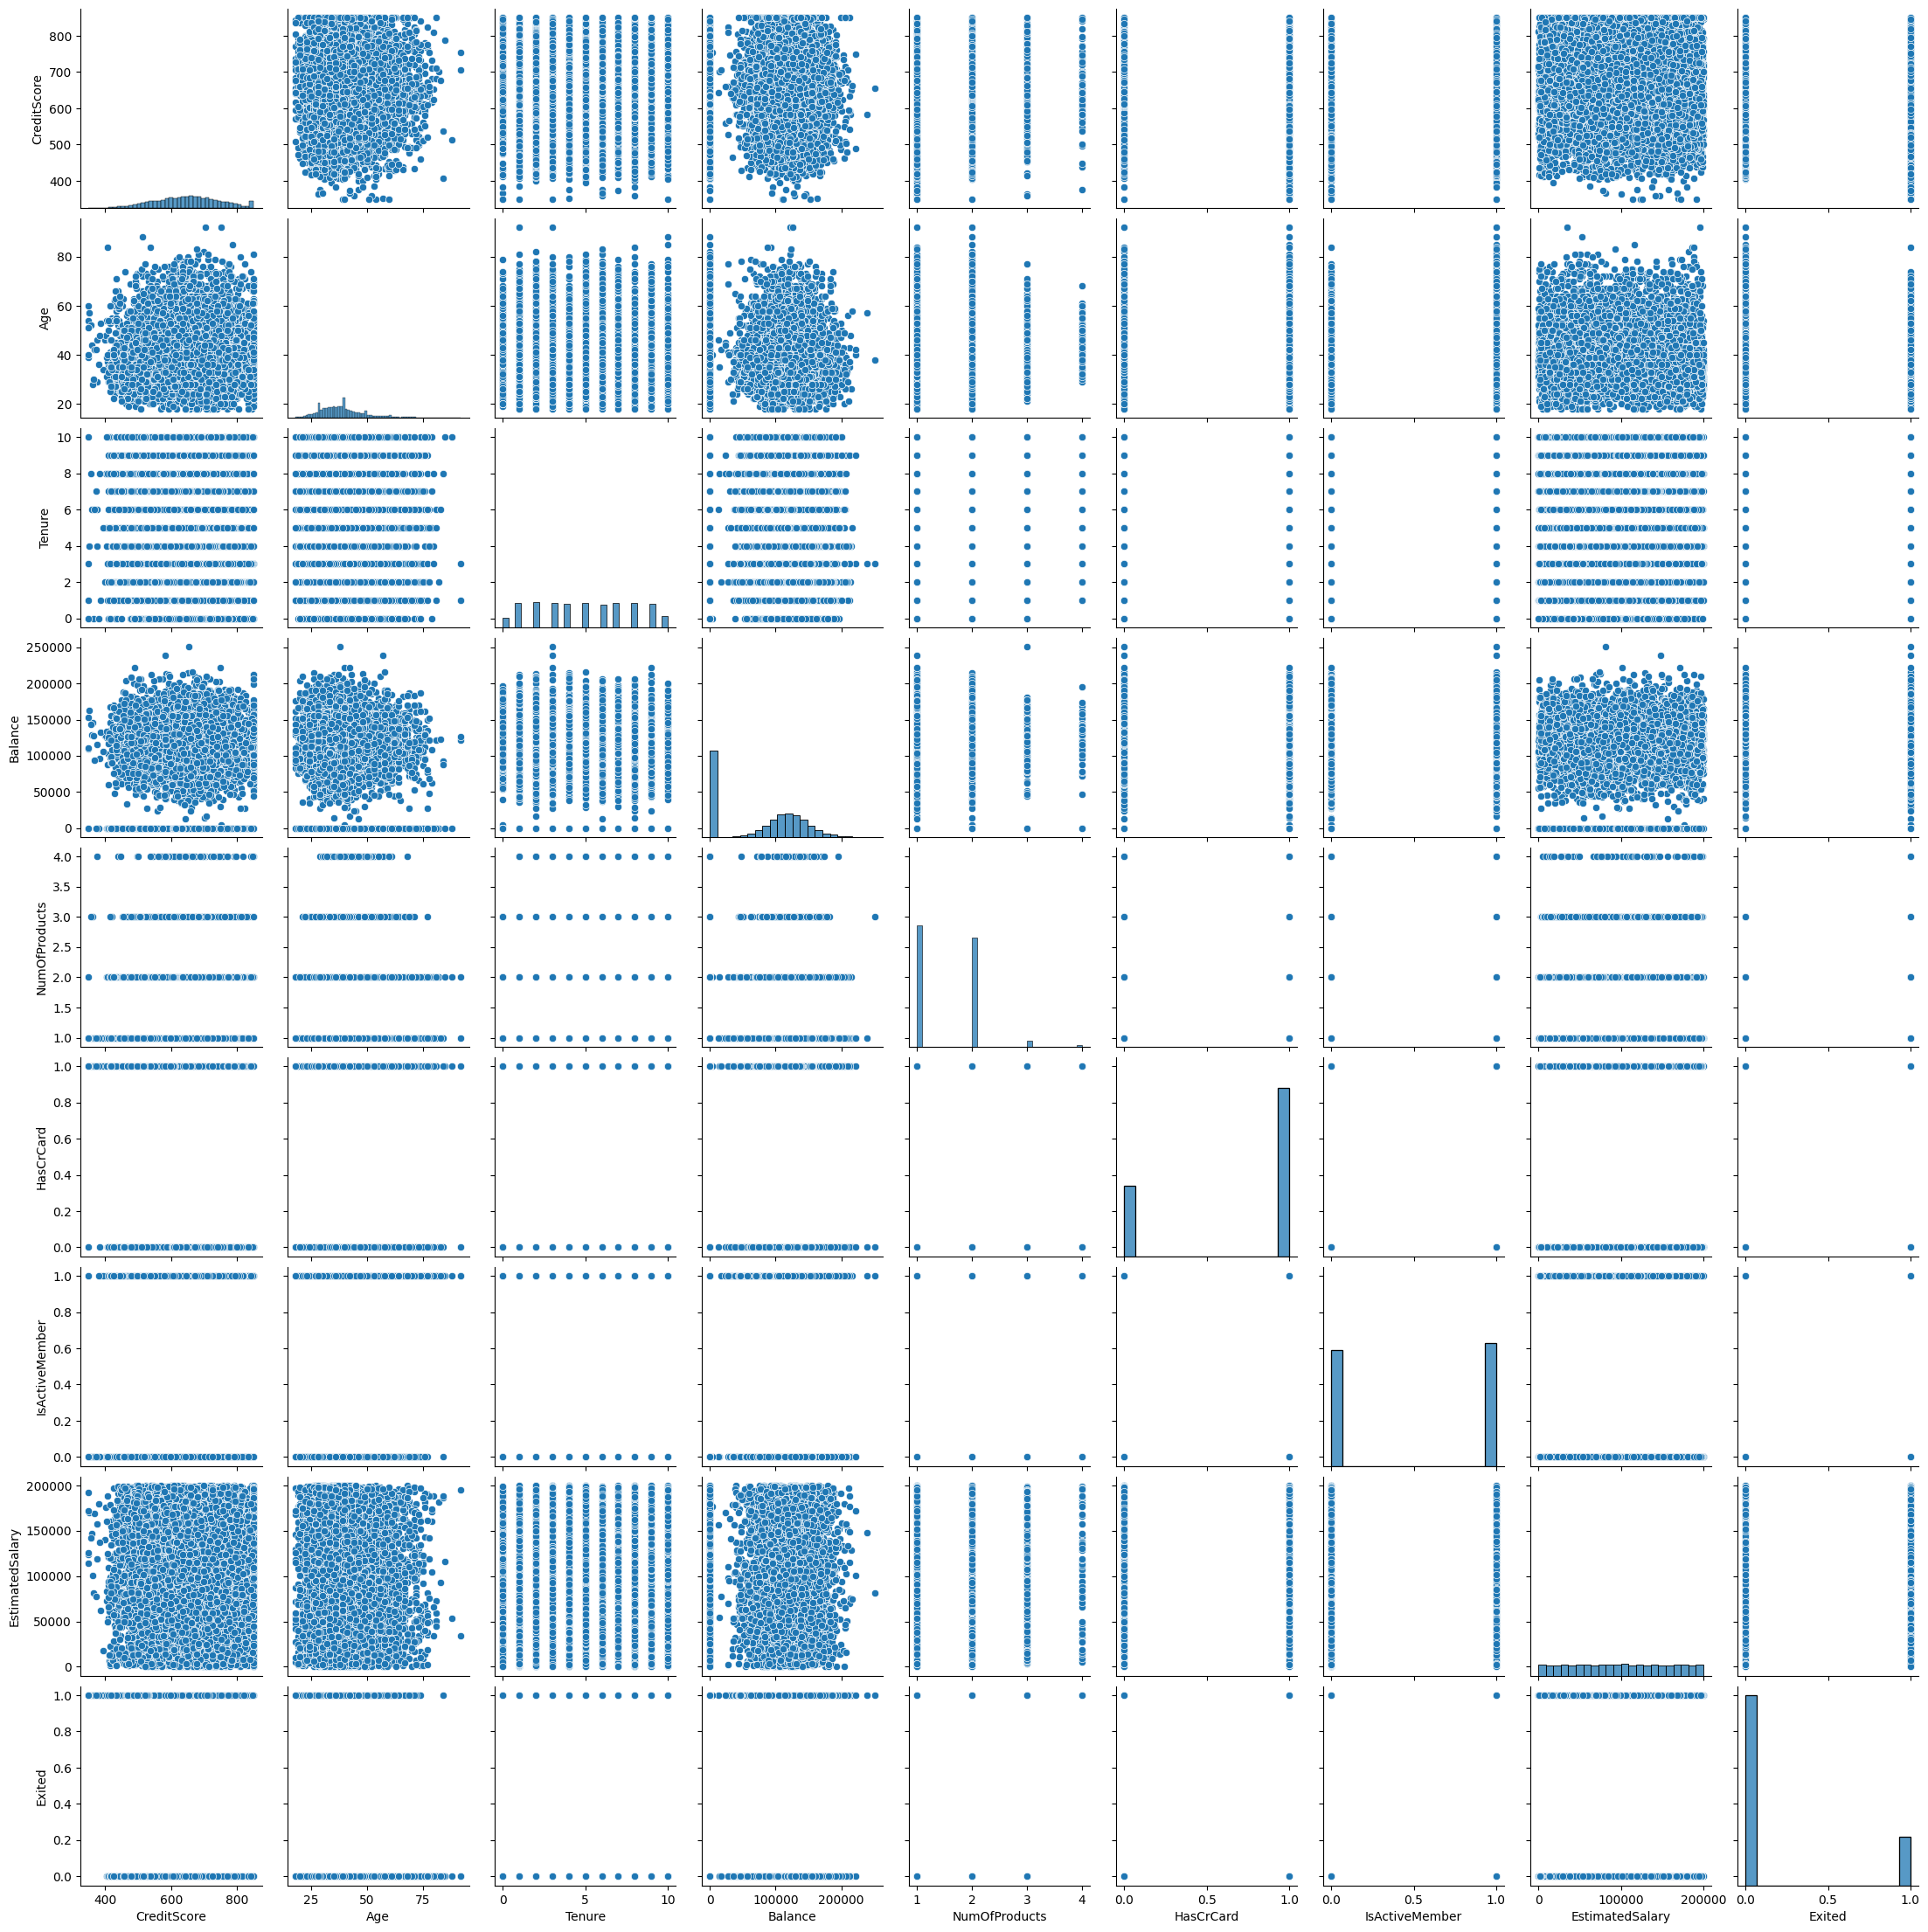

In [ ]:
# Pairplot untuk fitur numerik
sns.pairplot(num_features)
plt.show()

**Visualisasi Distribusi Variabel Target**

<ipython-input-15-185367e46e82>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=data, palette='viridis')


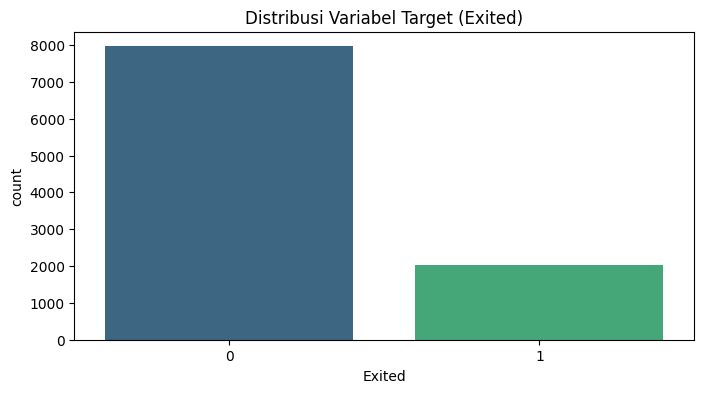

In [ ]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x='Exited', data=data, palette='viridis')
plt.title('Distribusi Variabel Target (Exited)')
plt.show()

# **Label Encoder**

In [ ]:
# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = ['Geography', 'Gender']

# Encode kolom kategorikal
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# **Data Splitting**

**Normalisasi**

In [ ]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['Exited'])
y = data['Exited']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(8000, 10), y_train=(8000,)
Test set shape: X_test=(2000, 10), y_test=(2000,)


# **Train Model**

In [ ]:
# Bagian 1: Pelatihan Model
# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


# **Evaluasi Model**

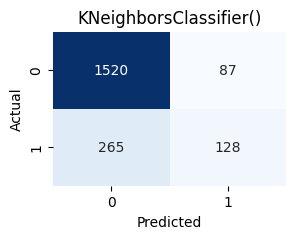

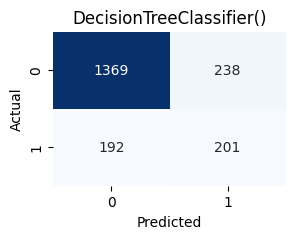

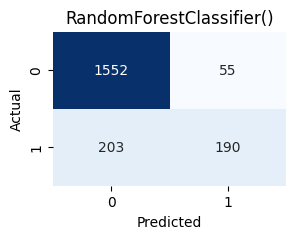

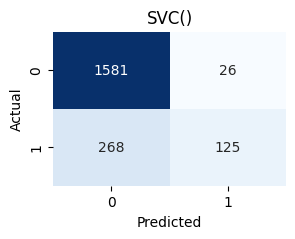

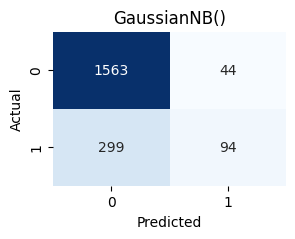

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)    0.8240   0.595349  0.325700  0.421053
1            Decision Tree (DT)    0.7850   0.457859  0.511450  0.483173
2            Random Forest (RF)    0.8710   0.775510  0.483461  0.595611
3  Support Vector Machine (SVM)    0.8530   0.827815  0.318066  0.459559
4              Naive Bayes (NB)    0.8285   0.681159  0.239186  0.354049


In [ ]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(model)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)